In [4]:
import pandas as pd
import numpy as np

# 数据导入

In [5]:
road = 'D:\垃圾桶二号\web搜索词.csv'

In [6]:
df = pd.read_csv(road,encoding='GBK')

# 数据查看

In [7]:
df.head()

,搜索词,搜索次数,搜索人数,现有模板数,编辑次数,编辑人数,下载次数,下载人数,搜索编辑率（次）,搜索编辑率（人）,编辑下载率(次),编辑下载率(人)
0,工人,21,10,1502.0,6,4,5,3,28.57%,40%,83.33%,75%
1,工作牌,20,10,132.0,11,6,6,2,55%,60%,54.55%,33.33%
2,工厂,37,10,328.0,3,2,0,0,8.11%,20%,0.00%,0.00%
3,工牌,23,10,161.0,21,7,2,1,91.30%,70%,9.52%,14.29%
4,幼儿园招生,20,10,647.0,10,5,0,0,50%,50%,0.00%,0.00%


In [8]:
# 查看数据形状
df.shape

(3736, 12)

In [ ]:
df.info() # 可以看缺失值

## 描述性统计

In [6]:
df.describe()    # 描述性统计

,搜索次数,搜索人数,现有模板数,编辑次数,编辑人数,下载次数,下载人数
count,3736.000000,3736.000000,3641.000000,3736.000000,3736.000000,3736.000000,3736.000000
mean,13.734743,5.055675,1008.477616,4.031585,1.883298,1.219218,0.582173
std,11.563875,2.026889,3781.502434,5.173361,1.752651,2.809692,0.941214
min,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,31.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,4.000000,145.000000,2.000000,2.000000,0.000000,0.000000
75%,17.000000,6.000000,548.000000,6.000000,3.000000,1.000000,1.000000
max,212.000000,10.000000,50000.000000,88.000000,10.000000,60.000000,7.000000


In [13]:
# 看单独一列内部结构
df['现有模板数'].value_counts()

1.0        132
2.0         85
3.0         46
4.0         45
5.0         41
          ... 
555.0        1
9215.0       1
36169.0      1
2409.0       1
1757.0       1
Name: 现有模板数, Length: 1266, dtype: int64

# 数据预处理

## 数值型数据

### 缺失值

#### 删除缺失值

```
df.dropna(axis=0)    # 删除含有缺失值的行
df.dropna(axis=1)    # 删除含有缺失值的列
df.dropna(thresh=3)    # 只保留全为数值的行
```

#### 缺失值填充

```
df.fillna(df.mean())    # 用平均值填充缺失值
df.fillna(0)    # 用特定值填充缺失值，这里用0
```

#### 插值填充缺失值

```
df.interpolate()    # 用插值法填充缺失值
```

### 异常值

#### 特殊符号清除

```
# 定义包含特殊字符的列表
special_characters = ['*', '-', '/', '%', '...', '/%']

# 替换特殊字符为 NaN
df.replace(special_characters,pd.NA, inplace=True)
```

```
df = df.fillna(0.00)    # 清楚后填充为0
```

#### 百分比改为浮点型

```
# 指定需要转换的列
columns_to_convert = ['点击率(点击次数)', '点击率(点击登录人数)'
                      , '点击率(点击UV数)', '点击率(点击IP数)'
                      , '下载率(下载次数)', '下载率(下载IP数)', '下载率(下载IP数)', '下载率(下载人数)']

# 去除百分号，并转换成浮点型数据
for column in columns_to_convert:
    if df[column].dtype == 'object':
        df[column] = df[column].str.rstrip('%').astype(float) / 100
```

#### Z分数/标准分数

```
# 识别异常值
z_score = (df['Values'] - df['Values'].mean())/df['Values'].std()
df['Z-Score'] = z_score
df['Outlier'] = np.where(np.abs(z_score) > 3, True, False)
```

```
# 处理异常值，替换成平均值
df.loc[df['Outlier'] == True, 'Values'] = df['Values'].mean()
print(df)
```

#### 箱型图

```
import matplotlib.pyplot as plt
import seaborn as sns
```

```
# 绘制箱型图
sns.boxplot(data['col1'])
plt.show()
```

## 分类数据

### 哑变量编码

### 顺序编码

### 独热编码

pandas的get_dummies，用于dataframe和series数据\
Scikit-learn的OneHotEncoder用于array数据

In [16]:
df = pd.DataFrame({
    'gender': ['male', 'female', 'male', 'male', 'female'],
    'income': ['low', 'high', 'medium', 'low', 'medium'],
    'age': [20, 25, 30, 35, 40]
})

In [17]:
df

,gender,income,age
0,male,low,20
1,female,high,25
2,male,medium,30
3,male,low,35
4,female,medium,40


In [18]:
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)
df = df.drop('gender', axis=1)

In [19]:
df

,income,age,female,male
0,low,20,0,1
1,high,25,1,0
2,medium,30,0,1
3,low,35,0,1
4,medium,40,1,0


## 数据类型修改

In [ ]:
# 将多列对象类型转换为整数类型
df[['A', 'B', 'C']] = df[['A', 'B', 'C']].astype(int)

# 数据可视化

## 数据分布

In [8]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['Simhei']    # 需要中文时候加

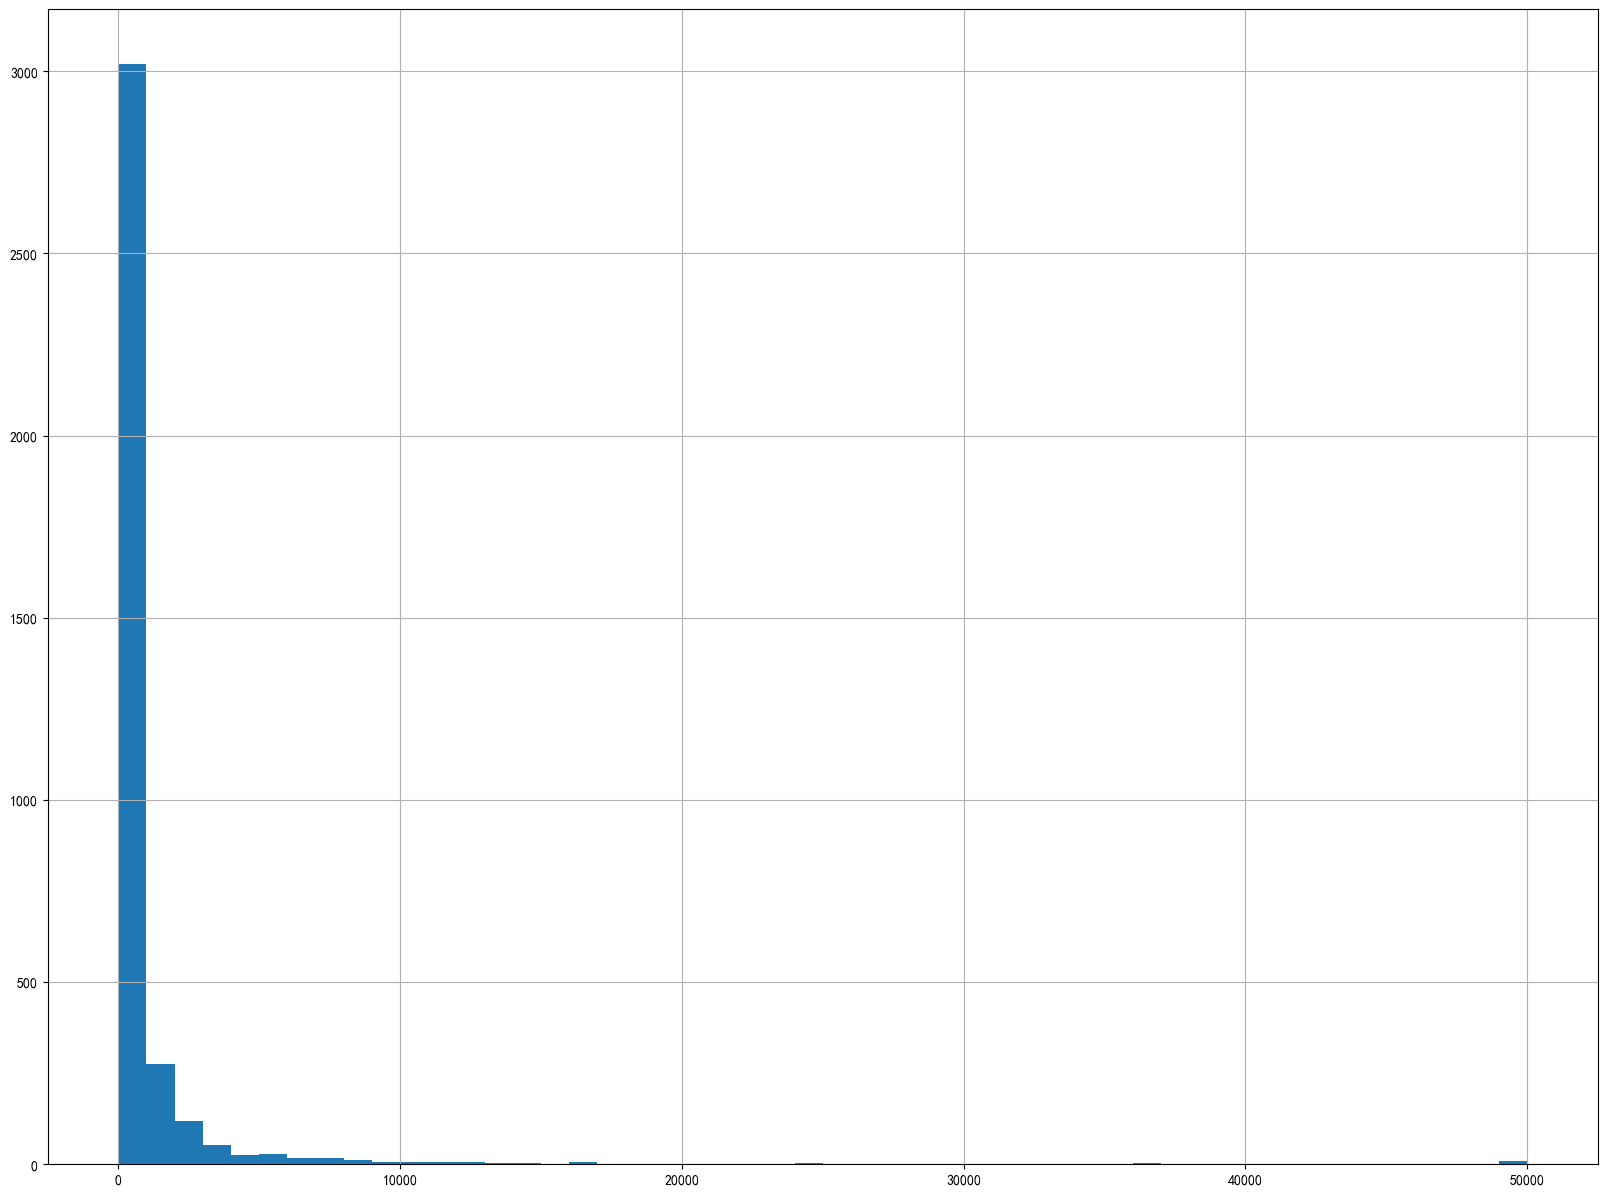

In [12]:
df.现有模板数.hist(bins=50    # 分箱个数
             ,figsize=(20,15)    # 可视化大小，直接看就设置小一点如20*15，想放大看就设置大一些
             #,range=(0,100)    # 设置上限和下限
             #,cumulative=True    # 是否计算累计
             #,orientation='vertical'    # 水平和垂直
             #,alpha=0.8    # 透明度
             #,histtype='step'    # 柱子颜色填充
             #,edgecolor='#FFD700'    # 描边颜色
             #,color='red'    # 整体颜色
            )    # hist是直方图，看看数据整体分布
plt.show()

## 相关性

### 绘制树形图

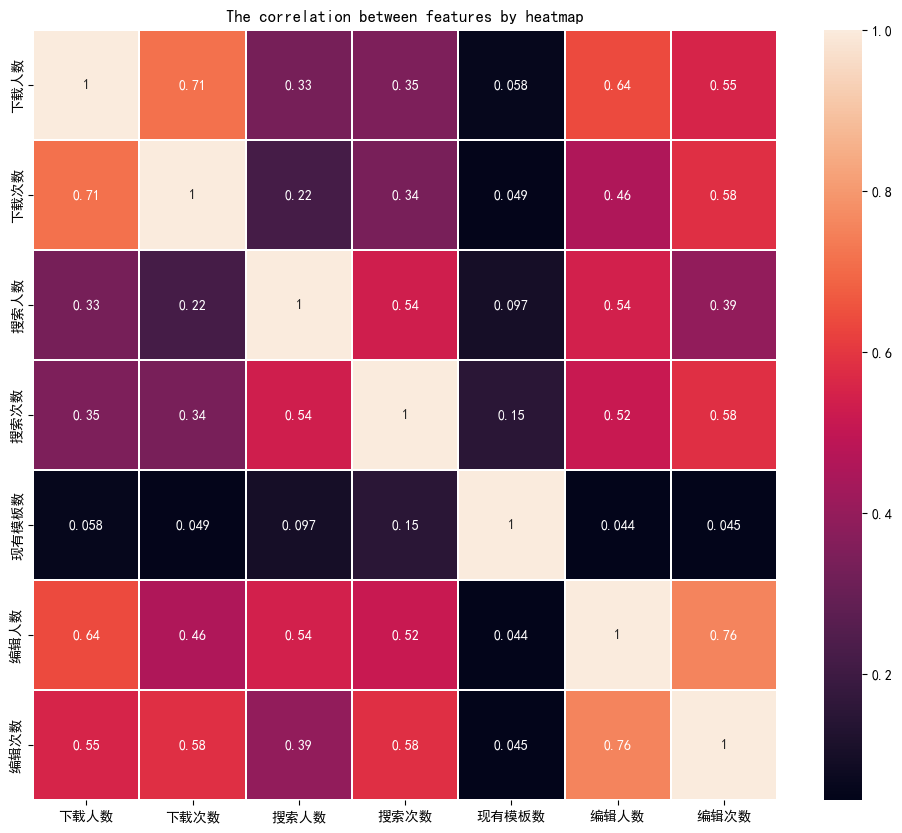

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Simhei']    # 需要中文时候加

# 数据归一化
scaled_data = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
scaled_data.head()

plt.title("The correlation between features by heatmap")
fig = plt.gcf()
fig.set_size_inches(12, 10)
sns.heatmap(scaled_data.corr(numeric_only=True),
            annot=True, linewidths=0.2)
plt.show()

### 皮尔逊相关系数

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# 实例化StandardScaler对象
scaler = StandardScaler()

# 对DataFrame的所有列进行标准化
scaled_data = scaler.fit_transform(df)

# 将标准化后的数据转换为DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [14]:
corr_matrix = scaled_df.corr(method='pearson')    # 默认皮尔逊相关系数，非正态数值型用spearman,分类数据用kendall
corr_matrix.sort_values(by='充值金额',axis=0,ascending=False)    # 可以按目标属性降序

,IP,注册人数,充值人数,充值金额,老客充值人数,老客充值金额,新客充值人数,新客充值金额,终身充值人数,终身充值金额,...,千库抠图充值金额,千库音乐充值人数,千库音乐充值金额,对公转账人数,对公转账金额,补差价人数,补差价金额,单张定制人数,单张定制金额,客单价
充值金额,0.605809,0.711948,0.832804,1.000000,-0.082562,-0.037855,0.655020,0.744074,0.923813,0.916819,...,-0.154882,-0.093252,-0.032859,-0.004082,0.023010,0.666792,0.622043,-0.090664,0.020470,0.098968
终身充值人数,0.564172,0.702942,0.806561,0.923813,-0.144129,-0.125305,0.661299,0.747781,1.000000,0.981317,...,-0.230796,-0.116341,-0.069564,-0.140636,-0.143535,0.596592,0.552785,-0.158724,-0.056469,-0.027055
终身充值金额,0.575311,0.696774,0.809013,0.916819,-0.207587,-0.187348,0.689748,0.784234,0.981317,1.000000,...,-0.285079,-0.139895,-0.085446,-0.165267,-0.165245,0.587034,0.569329,-0.204050,-0.106413,-0.057725
全站通下载版金额,0.533386,0.611093,0.716007,0.895757,-0.128212,-0.101403,0.587166,0.711634,0.929854,0.967839,...,-0.200122,-0.096990,-0.064121,-0.083831,-0.088786,0.591810,0.554781,-0.123824,-0.028473,0.067559
全站通下载版人数,0.490543,0.563116,0.655917,0.892803,0.011385,0.040574,0.483840,0.614589,0.921280,0.923942,...,-0.070426,-0.036493,-0.028304,0.002702,-0.009609,0.606030,0.519879,-0.013753,0.085462,0.188468
充值人数,0.618802,0.854912,1.000000,0.832804,-0.430518,-0.420915,0.925542,0.880004,0.806561,0.809013,...,-0.477812,-0.249654,-0.143775,-0.316588,-0.297463,0.505982,0.560908,-0.412984,-0.340496,-0.430714
企业充值人数,0.428837,0.335291,0.469813,0.768107,0.216466,0.277185,0.259170,0.366769,0.580061,0.565991,...,0.157941,0.049461,0.066481,0.271983,0.205768,0.605393,0.516782,0.174572,0.265225,0.405143
新客充值金额,0.559369,0.761499,0.880004,0.744074,-0.715457,-0.695785,0.955689,1.000000,0.747781,0.784234,...,-0.682275,-0.331157,-0.196434,-0.373178,-0.315007,0.476925,0.559254,-0.474196,-0.406250,-0.427146
注册人数,0.638657,1.000000,0.854912,0.711948,-0.378220,-0.373593,0.795522,0.761499,0.702942,0.696774,...,-0.374676,-0.245122,-0.134464,-0.259722,-0.239767,0.388765,0.431660,-0.379742,-0.309842,-0.379041
补差价人数,0.454967,0.388765,0.505982,0.666792,-0.015900,0.003502,0.383594,0.476925,0.596592,0.587034,...,-0.081857,-0.057418,-0.038669,-0.012929,-0.023501,1.000000,0.887799,-0.048677,0.060950,0.126127


### 绘制散点图

In [ ]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['Simhei']    # 需要中文时候加

df.hist(bins=50    # 分箱个数
             ,figsize=(20,15)    # 可视化大小
             #,range=(0,100)    # 设置上限和下限
             #,cumulative=True    # 是否计算累计
             #,orientation='vertical'    # 水平和垂直
             #,alpha=0.8    # 透明度
             #,histtype='step'    # 柱子颜色填充
             #,edgecolor='#FFD700'    # 描边颜色
             #,color='red'    # 整体颜色
            )    # hist是直方图，看看数据整体分布
plt.show()from sklearn.preprocessing import StandardScaler